# Absorption of wafer and thin-film silicon

In [3]:
%matplotlib inline
import numpy as np
from ivsolver import calculate_j01_from_qe,gen_rec_iv,calculate_j01
from detail_balanced_MJ import calc_mj_eta
from photocurrent import gen_qe_from_abs,gen_square_qe
from spectrum_base import spectrum_base
import matplotlib.pyplot as plt

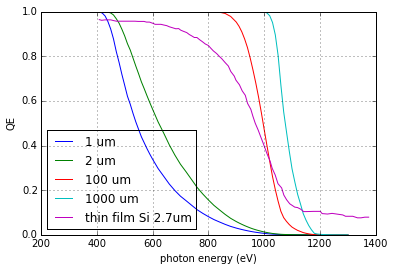

In [4]:
abs_file="../si_alpha.csv"
si_alpha=np.loadtxt(abs_file,delimiter=',')

thin_film_si_abs=np.loadtxt("thin_film_si_2p7um.txt")
thin_film_si_sp=spectrum_base()
thin_film_si_sp.set_spectrum(thin_film_si_abs[:,0],thin_film_si_abs[:,1],wavelength_unit='nm')
thin_film_si_abs=thin_film_si_sp.get_spectrum('nm')

si_alpha_sp=spectrum_base()
si_alpha_sp.set_spectrum(si_alpha[:,0],si_alpha[:,1],wavelength_unit='m')

si_layer=[1,2,100,1000]  #in um

qe_set=[gen_qe_from_abs(si_alpha_sp,t*1e-6) for t in si_layer]

for i,qe in enumerate(qe_set):
    qe_arr=qe.get_spectrum('nm')
    plt.plot(qe_arr[:,0],qe_arr[:,1],hold=True,label=str(si_layer[i])+" um")


plt.plot(thin_film_si_abs[:,0],thin_film_si_abs[:,1],label="thin film Si 2.7um")
plt.legend(loc='best')
plt.xlabel("photon energy (eV)")
plt.ylabel("QE")
plt.grid()